In [101]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    #Getting the data

In [104]:
salary_data = pd.read_csv(r"C:\Users\38063\Downloads\Salary_Data_Based_country_and_race.csv")

    #Quick look at data

In [105]:
salary_data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [106]:
salary_data.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [107]:
salary_data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

    #Barplot "Mean salary vs Country" separated by Gender

In [116]:
country_mean_salary = salary_data.groupby(['Country','Gender']) \
.aggregate({'Salary':'mean'}) \
.reset_index() \
.rename(columns={'Salary':'Mean Salary'})

[Text(0.5, 1.0, 'Barplot "Mean salary vs Country" separated by Gender')]

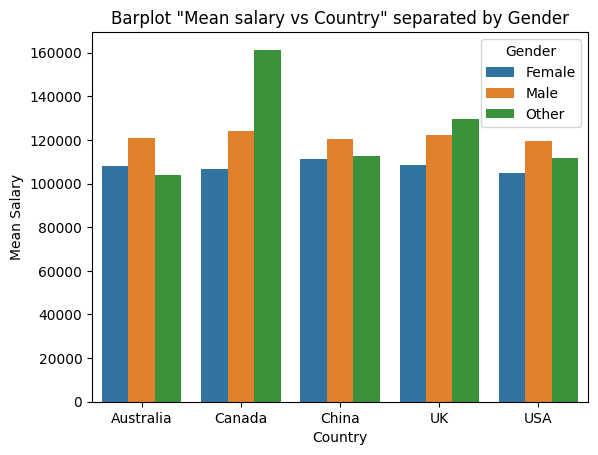

In [122]:
sns.barplot(data=country_mean_salary, x='Country', y='Mean Salary', hue='Gender') \
.set(title = "Barplot \"Mean salary vs Country\" separated by Gender")

    #Violinplot "Salary vs Country" separated by Gender

[Text(0.5, 1.0, 'Violinplot "Salary vs Country" separated by Gender')]

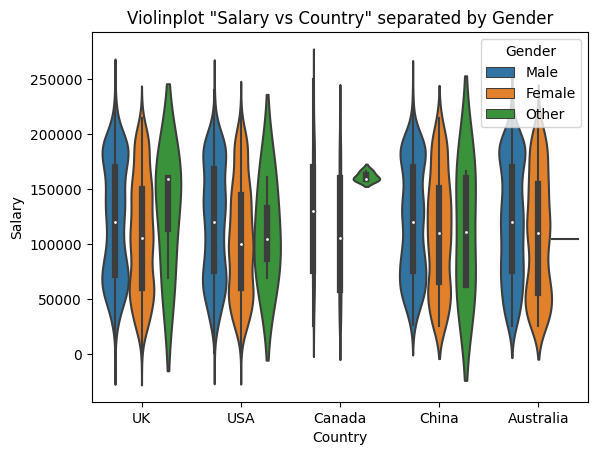

In [123]:
sns.violinplot(data=salary_data, x='Country', y='Salary', hue='Gender') \
.set(title = "Violinplot \"Salary vs Country\" separated by Gender")

    #Salary vs Years of Experience separeted by Gender with fitting lines

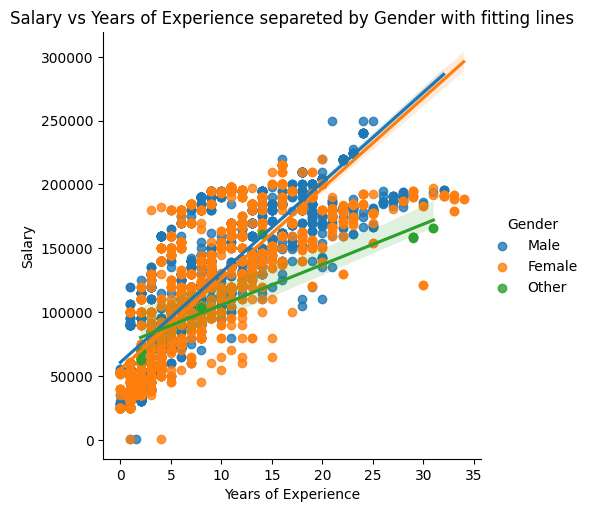

In [124]:
sns.lmplot(x="Years of Experience", y="Salary", hue="Gender", data=salary_data) \
    .set(title = "Salary vs Years of Experience separeted by Gender with fitting lines")

    #Mean salary vs Education Level

In [154]:
salary_data['Education Level'] = salary_data['Education Level'].replace("Bachelor's Degree","Bachelor's")
salary_data['Education Level'] = salary_data['Education Level'].replace("Master's Degree","Master's")
salary_data['Education Level'] = salary_data['Education Level'].replace("phD","PhD")

mean_salary_by_education_level = salary_data.groupby("Education Level") \
.aggregate({'Salary':'mean'}) \
.reset_index() \
.rename(columns={'Salary':'Mean Salary'}) \
.sort_values(by="Mean Salary", ascending = False)

[Text(0.5, 1.0, 'Mean salary vs Education Level')]

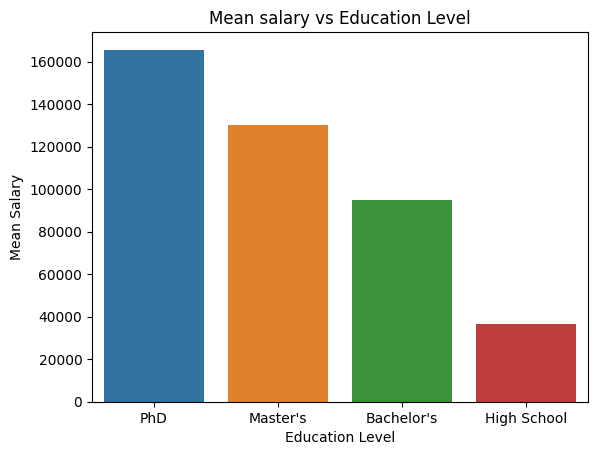

In [157]:
sns.barplot(data = mean_salary_by_education_level, x='Education Level',y='Mean Salary') \
.set(title = "Mean salary vs Education Level")

In [158]:
    #Top most popular professions and distribution by gender in them

In [196]:
most_popular_job = salary_data.groupby(["Job Title", "Gender"])["Salary"] \
.count() \
.reset_index() \
.sort_values(["Salary"], ascending=False).head(30)

most_popular_job = most_popular_job_titles.rename(columns = {"Salary": "Number of specialists"})

[Text(0.5, 1.0, 'Barplot "Job Title vs Number of specialists" separated by Gender ')]

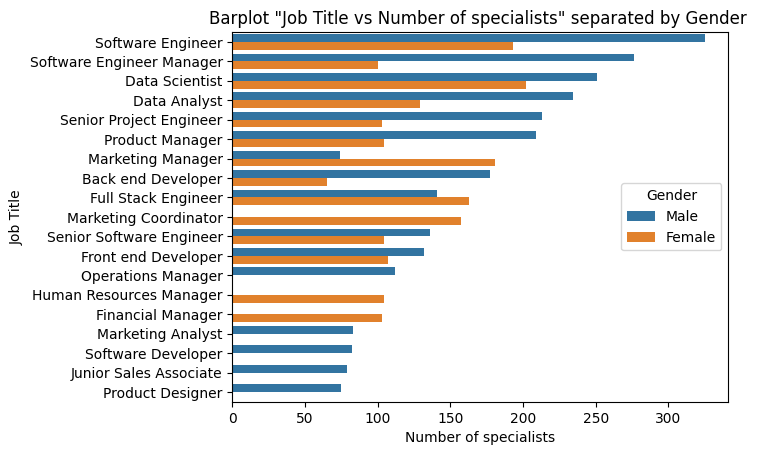

In [199]:
sns.barplot(data=most_popular_job,x='Number of specialists',y='Job Title',hue='Gender') \
.set(title = "Barplot \"Job Title vs Number of specialists\" separated by Gender ")

    #Mean Salary grouped by Race and Country

In [207]:
mean_salary_by_country_and_race = salary_data.groupby(['Country','Race']) \
.aggregate({'Salary':'mean'}) \
.rename(columns={'Salary':'Mean Salary'})

In [208]:
mean_salary_by_country_and_race

Mean Salary
Country   Race                           
Australia Asian             114408.016807
          Australian        114236.676991
          White             116265.757353
Canada    Asian             115159.859341
          Black             118601.212815
          White             115961.212471
China     Chinese           111139.315315
          Korean            117099.757112
          White             120570.158371
UK        Asian             118621.178571
          Mixed             116330.859281
          Welsh             112560.645646
          White             116218.624625
USA       African American  112209.658192
          Asian             113442.107143
          Hispanic          110410.139752
          White             115763.792507